## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Relaxometry of Femoral Knee Cartilage](https://sbonaretti.github.io/pyKNEEr/relaxometry.html)
# Extended Phase Graph (EPG) modeling

Relaxometry maps are calculated using *Extended Phase Graph (EPG) modeling* (e.g. $T_{2}$ maps, from DESS acquisitions) [1]

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./inHouse/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "inHouse_preprocessed.zip" 
zipped_segm_name   = "inHouse_segmented.zip"
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_relaxometry_EPG_inHouse_T2.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# download segmented images
wget.download(input_URL + zipped_segm_name, local_folder_name + zipped_segm_name)

In [ ]:
# unzip image folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# unzip segmented images
with ZipFile(local_folder_name + zipped_segm_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io         as io
from pykneer import relaxometry_for_nb as rel
import itk
import itkwidgets
from itkwidgets import view

## Image information

Inputs:   
- `input_file_name` contains the list of the images used to to calculate $T_{2}$ using EPG modeling
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)
- `output_file_name` contains average and standard deviation of the $T_{2}$ maps

In [3]:
# input_file_name  = "./image_list_relaxometry_EPG_inHouse_T2.txt" # commented out because downloaded from GitHub
n_of_cores       = 4
output_file_name = "EPG_inHouse_T2.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_EPG(input_file_name)

-> relaxometry folder /Volumes/SereHD/work/data_pyKNEEr/inHouse/relaxometry/ created
01_DESS_1_orig
02_DESS_1_orig
03_DESS_1_orig
04_DESS_1_orig
-> information loaded for 4 subjects


## Calculate  $T_{2}$ maps

In [5]:
rel.calculate_t2_maps(image_data, n_of_cores)

02_DESS_1_orig
01_DESS_1_orig
04_DESS_1_orig
03_DESS_1_orig
-> T2 maps calculated
-> The total time was 15.87 seconds (about 0 min)


## Visualize  $T_{2}$ maps

#### 2D MAP: For each image, fitting maps at medial and lateral compartments and flattened map
The flattened map is an average of neighnoring voxels projected on the bone surface side of the femoral cartilage

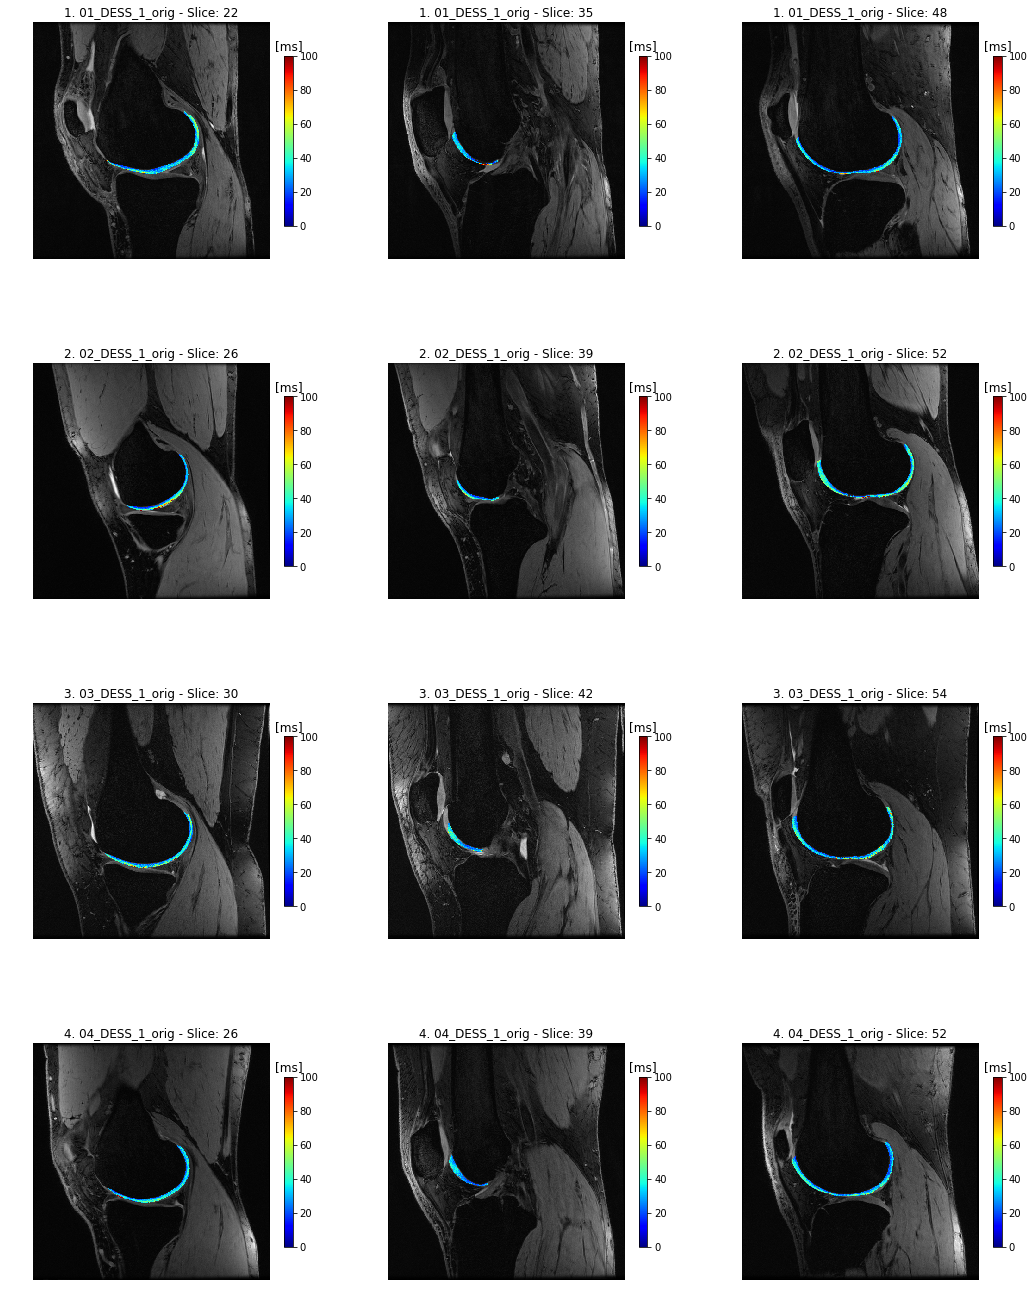

In [6]:
rel.show_t2_maps(image_data)

#### 3D MAP: Interactive rendering of $T_{2}$ maps
(The error message "Error creating widget: could not find model" can appear when the notebook is moved to a different folder)

In [7]:
# ID of the map to visualize (The ID is the one in the 2D visualization above)
image_ID = 1 -1 # -1 because counting starts from 0
image_ID = 1

# read image
file_name = image_data[image_ID]["relaxometryFolder"] + image_data[image_ID]["t2mapMaskFileName"]
image = itk.imread(file_name)

# view
viewer = view(image, gradient_opacity=0.0, ui_collapsed=False, shadow=False)
viewer

Viewer(gradient_opacity=0.01, rendered_image=<itkImagePython.itkImageSS3; proxy of <Swig Object of type 'itkIm…

#### GRAPH: Dots represent the average value of $T_{2}$ per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

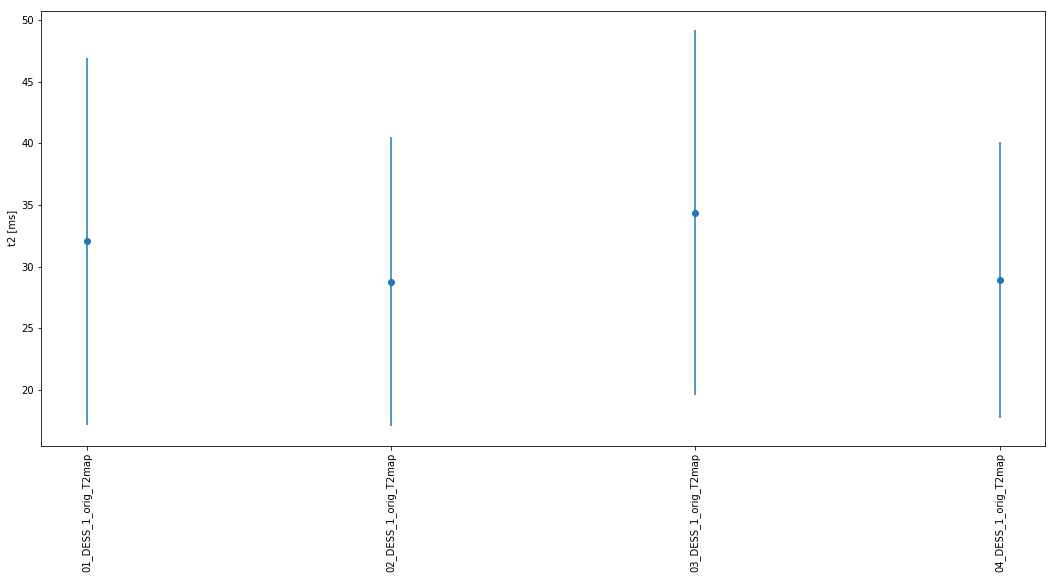

In [8]:
rel.show_t2_graph(image_data)

#### TABLE: Average and standard deviation of $T_{2}$ per image
The table is saved as a .csv file for subsequent analyisis

In [9]:
rel.show_t2_table(image_data, output_file_name)

Table saved as: EPG_inHouse_T2.csv


,subjects,average,stddev
1,04_DESS_1_orig_T2map.mha,32.08,14.87
2,04_DESS_1_orig_T2map.mha,28.80,11.69
3,04_DESS_1_orig_T2map.mha,34.36,14.80
4,04_DESS_1_orig_T2map.mha,28.96,11.19


### References

[1] Sveinsson B, Chaudhari AS, Gold GE, Hargreaves BA. [*A simple analytic method for estimating $T_{2}$ in the knee from DESS.*](https://www.ncbi.nlm.nih.gov/pubmed/28017730) Magn Reson Imaging. May;38:63-70. 2017.

### Dependencies

In [10]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,scipy,itkwidgets,multiprocessing

elastix 4.8.0

CPython 3.7.1
IPython 6.5.0

SimpleITK unknown
matplotlib 2.2.3
numpy 1.15.1
pandas 0.23.4
scipy 1.1.0
itkwidgets 0.15.2
multiprocessing unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
